## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('26__titanic.csv', sep=",")


# EDA - 1 krok: Przegląd danych¶

## Sprawdzam ogólne informacje o danych. 
### Otrzymałem dane z ogólnymi informacjami:
- Dane odnoszą się do pasażerów Titanica, który zatonął w najbardziej znanej katastrofie morskiej 
- Wyjaśnienie znaczenia nazw poszczególnych kolumn, zamieszczone powyżej
### Poszukiwane elementy
- Ile jest kategorii do analizy
- Ile jest rekordów (obserwacji)
- Czy są wartości brakujące (jeśli tak, to ile mamy braków)
- Jakiego typu dane są zgromadzone

In [3]:
df.info()  # Ogólne informacje o danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
df.nunique()  # Ilość wartości unikatowych

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [5]:
df.duplicated().value_counts()

False    1310
dtype: int64

In [6]:
df.sample(10) # Przykładowe 10 rekordów

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
455,2.0,0.0,"Howard, Mr. Benjamin",male,63.0000,1.0,0.0,24065,26.00,NaN,S,NaN,NaN,"Swindon, England"
548,2.0,1.0,"Richards, Master. George Sibley",male,0.8333,1.0,1.0,29106,18.75,NaN,S,4,NaN,"Cornwall / Akron, OH"
1005,3.0,0.0,"McEvoy, Mr. Michael",male,NaN,0.0,0.0,36568,15.50,NaN,Q,NaN,NaN,NaN
387,2.0,1.0,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0000,0.0,2.0,C.A. 33112,36.75,NaN,S,14,NaN,"St Ives, Cornwall / Hancock, MI"
1160,3.0,0.0,"Rouse, Mr. Richard Henry",male,50.0000,0.0,0.0,A/5 3594,8.05,NaN,S,NaN,NaN,NaN
1211,3.0,0.0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0000,1.0,4.0,347088,27.90,NaN,S,NaN,NaN,NaN
363,2.0,0.0,"Campbell, Mr. William",male,NaN,0.0,0.0,239853,0.00,NaN,S,NaN,NaN,Belfast
225,1.0,0.0,"Payne, Mr. Vivian Ponsonby",male,23.0000,0.0,0.0,12749,93.50,B24,S,NaN,NaN,"Montreal, PQ"
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5000,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN
1080,3.0,1.0,"O'Keefe, Mr. Patrick",male,NaN,0.0,0.0,368402,7.75,NaN,Q,B,NaN,NaN


## Wyświetlenie podstawowych danych statystycznych

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Spostrzeżenia
- **Dane dotyczą pasażerów Titanica**
- **Dane zawierają 14 kategorii do analizy** 
- **Dane zawierają 1310 rekordów wolnych od duplikatów (każdy wiersz reprezentuje jedną osobę), dane obejmują więc informacje o 1310 osobach**
- **Informaje o poszczególnych kategoriach**:
  - rozpoznano 3 różne klasy biletu
  - część osób na pokładzie przeżyła katastrofę a część zgineła
  - wśród pasażerów byli mężczyźni i kobiety
  - pasażerowie byli bardzo zróżnicowani pod względem wieku (od kilku miesięcy do 80 lat)
  - część pasażerów podróżowała z najbliższą rodziną jednak większość podróżowała bez najbliższych
  - ceny biletów były bardzo zróżnicowane
  - Titanic miał 186 kabin
  - pasażerowie wsiadali na pokład z 3 różnych portów
  - Titanic miał 27 łodzi ratunkowych
  - 121 osób poniosło śmierć i ich ciała zostały odnalezione
  - pasażerowie podróżowali do 369 miejsc docelowych
- **W zbiorze danych występują puste wartości**
- **Kategorie w zbiorze danych zawierące wartości liczbowe**:
  1. Klasa biletu - 'pclass'
  2. Informacja o tym czy pasażer przeżył - 'survived'
  3. Wiek pasażera - 'age'
  4. Liczba rodzeństwa/małżonków na pokładzie - 'sibsp'
  5. Liczba rodziców/dzieci na pokładzie - 'parch'
  6. Cena biletu - 'fare'
  7. Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione) - 'body'
- **Kategorie w zbiorze danych zawierące wartości nieliczbowe**:
  1. Imię i Nazwisko - 'name'
  2. Płeć - 'sex'
  3. Nazwę portu w którym pasażer wszedł na pokład - 'embarked'
  4. Miejsce docelowe - 'home.dest'
- **Kategorie w zbiorze danych zawierące wartości mieszane**:
  1. Numer biletu - 'ticket'
  2. Numer kabiny - 'cabiny'
  3. Numer łodzi ratunkowej - 'boat'
- **Większość osób miała najtańsze bilety, co sugeruje że zdecydowana liczba pasażerów była znacznie uboższa od niewielkiej części osób bogatych**
- **Około 38% pasażerów przeżyło katastrofę, 62% poniosło śmierć**


# EDA - 2 krok: Analiza brakujących wartości

In [8]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
df[df['pclass'].isnull()==1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Spostrzeżenia
- **1 rekord zawiera wszystkie informacje puste, jest więc bezużyteczny**
- **duża ilość braków dla kategorii wiek, jednak moja ocena wpływu na wyniki mocno ogranicznona**
- **Niewielka ilość braków dla kategorii cena biletu początku podróży**
- **Bardzo duża ilość braków dla kategorii numer kabiny. W mojej ocenie kategoria bez wpływu na badanie**
- **Niewielka ilość braków dla kategorii miejsca początku podróży**
- **Duża ilość braków numeru łodzi ratunkowej może mieć związek z ilością osób które zgineły**
- **Bardzo duża ilość braków numerów ciał ma uzasadnienie w stosunkowo niewielkiej liczby ciał odnalezionych spośród wszystkich podróżnych**
- **Duża ilość braków miesca docelowego w mojej ocenie ma ograniczony wpływ na wyniki badania**

# EDA - 3 krok: Transformacja danych

In [10]:
df.dropna(how='all', inplace=True) # Usunięcie rekordu zawierającego wszystkie wartości puste

In [11]:
df['family']=df['sibsp']+df['parch']    # nowa kolumna przedstawiająca liczbę rodzeństwa/małżonków oraz rodziców/dzieci na pokładzie
                                        # pomoże zbadać zależność przeżywalności od liczby członków rodziny na pokładzie

In [12]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",3.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,1.0
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,1.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0.0


# EDA - 4 krok: Analiza pojedynczych zmiennych

In [13]:
df['sibsp'].value_counts()                       # ilości osób podróżujących wraz z rodzeństwem/małżonkiem oraz bez

0.0    891
1.0    319
2.0     42
4.0     22
3.0     20
8.0      9
5.0      6
Name: sibsp, dtype: int64

In [14]:
df['parch'].value_counts()                       # ilości osób podróżujących wraz z rodzicami/dziećmi i bez 

0.0    1002
1.0     170
2.0     113
3.0       8
4.0       6
5.0       6
6.0       2
9.0       2
Name: parch, dtype: int64

In [15]:
df['survived'].value_counts()                    # Ilość osób, która przeżyła a ile poniosło śmierć

0.0    809
1.0    500
Name: survived, dtype: int64

In [16]:
lost_df=df[df['survived']==0]                    # Nowy DataFrame składający się tylko z pasażerów, którzy zgineli

In [17]:
lost_No=lost_df['survived'].count()              # Ilość osób, które zgineły
lost_No

809

In [18]:
survived_df=df[df['survived']==1]                # Nowy DataFrame zkładający się tylko z pasażerów, którzy przeżyli katastrofę

In [19]:
survived_No=survived_df['survived'].count()      # Ilość osób, które przetrwały
survived_No

500

In [20]:
df['body'].count()                               # Ilość osób które zgineły a ich ciała zostały odnalezione

121

In [21]:
lost_X_No=lost_No-df['body'].count()             # Ilość osób które zgineły a ich ciała nie zostały odnalezione
lost_X_No

688

In [22]:
df.groupby('pclass',as_index=False).agg({'fare':['max','min','mean','median','std']})

pclass      fare                                    
               max  min       mean   median        std
0    1.0  512.3292  0.0  87.508992  60.0000  80.447178
1    2.0   73.5000  0.0  21.179196  15.0458  13.607122
2    3.0   69.5500  0.0  13.302889   8.0500  11.494358

In [23]:
FARE_df=df[df['fare']!=0]         # Nowy DataFrame składający się tylko z pasażerów którzy bilety po koszcie >0
                                  # Posłuży do analizy wpływu ceny biletów jako wyznacznika zamożności

In [24]:
FARE_df.groupby('pclass',as_index=False).agg({'fare':['max','min','mean','median','std']})

pclass      fare                                       
               max     min       mean   median        std
0    1.0  512.3292  5.0000  89.447482  61.3792  80.259713
1    2.0   73.5000  9.6875  21.648108  15.0500  13.382064
2    3.0   69.5500  3.1708  13.378473   8.0500  11.483004

In [25]:
FARE_df.describe()

,pclass,survived,age,sibsp,parch,fare,body,family
count,1292.000000,1292.000000,1038.000000,1292.000000,1292.000000,1291.000000,120.000000,1292.000000
mean,2.301084,0.385449,29.827232,0.505418,0.390093,33.733917,161.233333,0.895511
std,0.836743,0.486890,14.430109,1.046910,0.870105,51.956349,97.995004,1.590759
min,1.000000,0.000000,0.166700,0.000000,0.000000,3.170800,1.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.925000,71.500000,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.500000,155.500000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.331250,256.500000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,10.000000


In [26]:
df[df['fare']==0]['fare'].count()                       # Ilość osób z biletem po koszcie 0

17

In [27]:
df[(df['fare']>0)&(df['fare']<50)]['fare'].count()      # Ilość osób z biletem po koszcie 0-50

1049

In [28]:
df[(df['pclass']==1)&(df['fare']==0)]['fare'].count()   # Ilość osób z biletem 1 klasy po koszcie 0

7

### Wykres przedstawiający przeżywalność z podziałem na klasę biletów

<Axes: xlabel='pclass'>

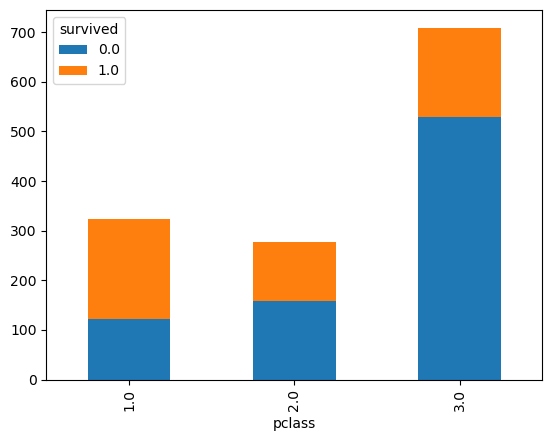

In [29]:
df.groupby(['pclass','survived']).size().reset_index().pivot(columns='survived', index='pclass',values=0).plot(kind='bar', stacked=True)

### Histogram przedstawiający przeżywalność z podziałem na cenę biletów wśród wszystkich pasażerów

<Axes: ylabel='Frequency'>

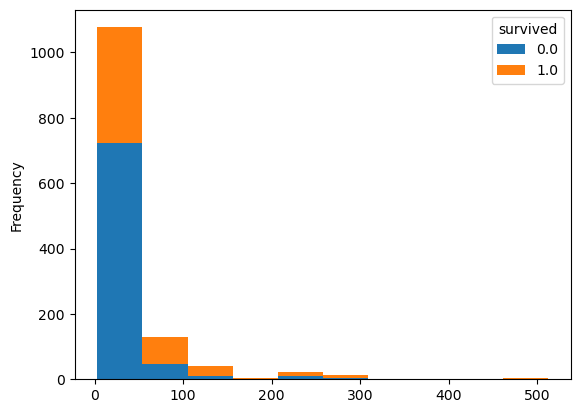

In [30]:
FARE_df.pivot(columns='survived').fare.plot(kind='hist', stacked=True)

### Histogram przedstawiający przeżywalność z podziałem na cenę biletów wśród grupy 75% najtańszych biletów

<Axes: ylabel='Frequency'>

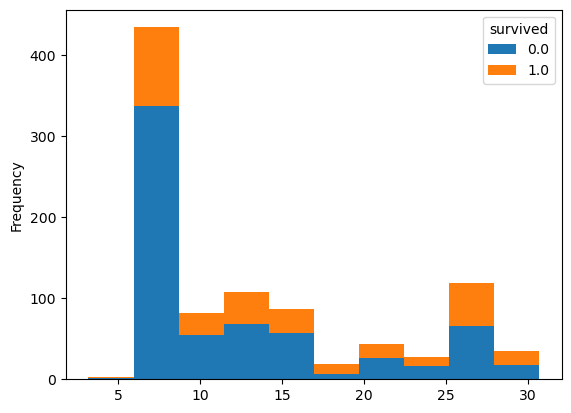

In [31]:
FARE_df[FARE_df['fare']<31].pivot(columns='survived').fare.plot(kind='hist', stacked=True)

### Histogram przedstawiający przeżywalność z podziałem na cenę biletów wśród grupy 25% najdroższych biletów

<Axes: ylabel='Frequency'>

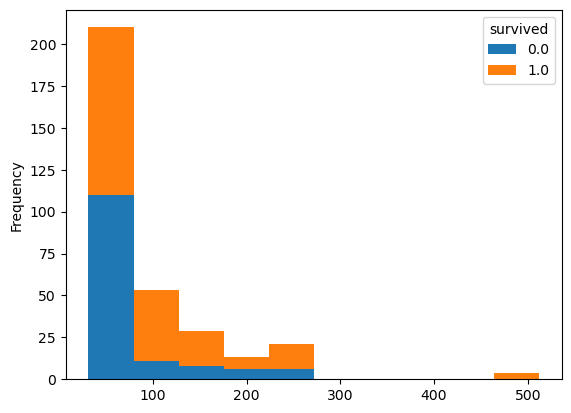

In [32]:
FARE_df[FARE_df['fare']>31].pivot(columns='survived').fare.plot(kind='hist', stacked=True)

### Histogram przedstawiający przeżywalność z podziałem na cenę biletów droższych od 20% najdroższego biletu

<Axes: ylabel='Frequency'>

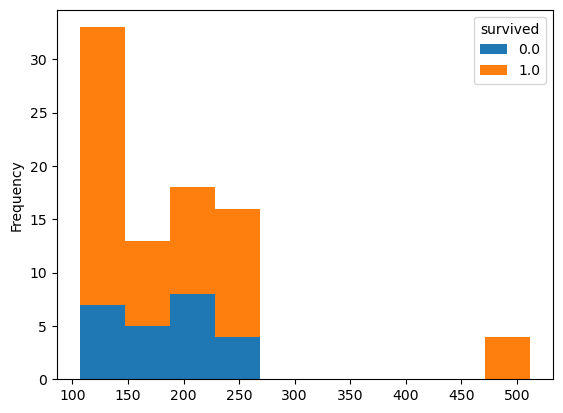

In [33]:
FARE_df[FARE_df['fare']> 0.2*FARE_df['fare'].max()].pivot(columns='survived').fare.plot(kind='hist', stacked=True)

### Wykres przedstawiający przeżywalność z podziałem na liczbę członków rodziny na pokładzie

<Axes: xlabel='family'>

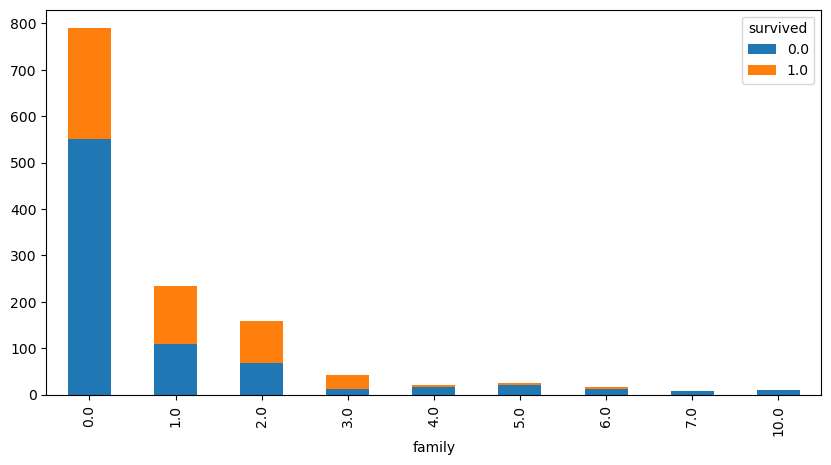

In [34]:
df.groupby(['family','survived']).size().reset_index().pivot(columns='survived', index='family',values=0).plot(kind='bar', stacked=True,figsize=(10,5))

### Histogram przedstawiający przeżywalność z podziałem na płeć

<Axes: xlabel='sex'>

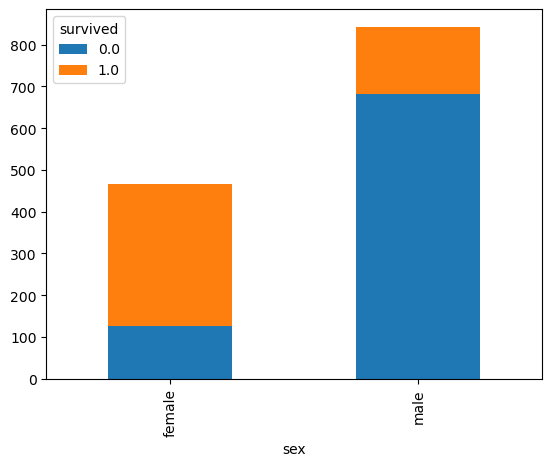

In [35]:
df.groupby(['sex','survived']).size().reset_index().pivot(columns='survived', index='sex',values=0).plot(kind='bar', stacked=True)

### Histogram przedstawiający przeżywalność z podziałem na wiek

<Axes: ylabel='Frequency'>

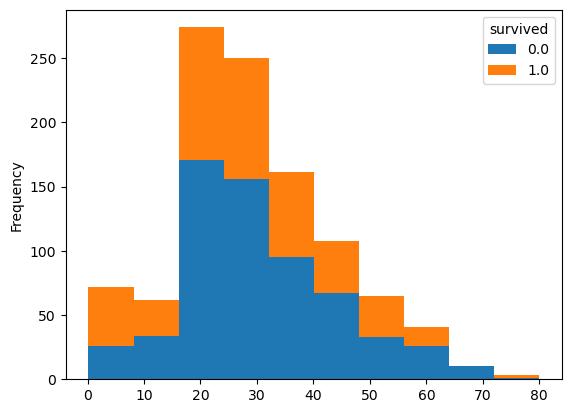

In [36]:
df.pivot(columns='survived').age.plot(kind='hist', stacked=True)

### Założenia ustalone arbitralnie
- bilety tanie - cena niższa od 10% biletu najdroższego
- bilety droższe - cena wyższa od 20% biletu nadroższego

In [37]:
(FARE_df[FARE_df['fare']> 0.2*FARE_df['fare'].max()]['fare'].count())/FARE_df['fare'].count()*100  # Procentowy udział biletów droższych w odniesieniu do wszystkich biletów

6.506584043377226

In [38]:
(FARE_df[FARE_df['fare']< 0.1*FARE_df['fare'].max()]['fare'].count())/FARE_df['fare'].count()*100  # Procentowy udział biletów tanich w odniesieniu do wszystkich biletów

81.56467854376453

In [39]:
(df[df['family']==0]['family'].count())/df['family'].count()*100  # Procentowy udział podróżującyh bez rodziny

60.35141329258976

In [40]:
(df[df['family']==1]['family'].count())/df['family'].count()*100  # Procentowy udział podróżującyh z 1 członkiem rodziny

17.95263559969442

In [41]:
(df[df['family']==2]['family'].count())/df['family'].count()*100  # Procentowy udział podróżującyh z 2 członkami rodziny

12.146676852559207

### Komentarz
1. Klasa i cena biletów
   - 17 biletów kosztowało 0. Jest to dość nietypowe. Sugeruje to 2 możliwe sytuację:
     - bilety były darmowe dla pasażerów, którzy pełnili na statku służbę
     - jest to błąd i bilety te powinny być pominięte w dalszej analizie cen
   - Większość osób miało bilety klas 3. Zależność klasy od ceny biletu będzie badana dalej.
   - Na tym etapie zaobserwowano różne przedziały cen wśród różnych klas. Najbardziej zróżnicowana cenowo jest klasa 1.
   - Zdecydowana większość osób miała tanie bilety:
   - cena 75 % wszystkich biletów wynosiła około 6% najdroższego biletu
   - cena 81 % wszystkich biletów wynosiła poniżej 10% najdroższego biletu
   - Tylko nieznaczna ilość osób nabyła bilety droższe 6,5% wszystkich biletów
2. Wiek
   - Dominowali pasażerowie w wieku 20-40 lat
3. Ilość członków rodziny na pokładzie
   - Zdecydowana większość pasażerów podróżowała bez rodziny 60% wszystkich pasażerów
   - tylko 18% pasażerów podróżowała z 1 członkiem rodziny
   - 40% wszystkich pasażerów podróżowała z co najmniej 1 członkiem rodziny
4. Informaca o przetrwaniu
   - 809 osób zgineło, w tym:
     - 121 osób zgineły a ich ciała zostały odnalezione
     - 688 osób zgineły a ich ciała nie zostały odnalezione
   - 500 osób przeżyło co stanowi 38% wszystkih badanych pasażerów
   - Proporcjonalnie najwięcej osób przeżyło w grupie z biletami klasy 1
   - Znaczący odsetek osób przeżyło wśród pasażerów z droższymi biletami po cenie większej od 20% najdroższego biletu
   - Ponad połowa osób przeżyła wśród pasażerów podróżujących z 1,2 i 3 członkami rodziny
   - Przeżywalność wśród kobiet była zdecydowanie większa niż u mężczyzn
   - Najmłodsza grupa wiekowa (0-10 lat) charakteryzowała się nawiększą przeżywalnością

# EDA - 5 krok: Analiza relacji między zmiennymi

## Macierz korelacji

In [42]:
df.corr().round(2)

C:\Users\pwtor\AppData\Local\Temp\ipykernel_640\1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,pclass,survived,age,sibsp,parch,fare,body,family
pclass,1.00,-0.31,-0.41,0.06,0.02,-0.56,-0.03,0.05
survived,-0.31,1.00,-0.06,-0.03,0.08,0.24,NaN,0.03
age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.06,-0.24
sibsp,0.06,-0.03,-0.24,1.00,0.37,0.16,-0.10,0.86
parch,0.02,0.08,-0.15,0.37,1.00,0.22,0.05,0.79
fare,-0.56,0.24,0.18,0.16,0.22,1.00,-0.04,0.23
body,-0.03,NaN,0.06,-0.10,0.05,-0.04,1.00,-0.03
family,0.05,0.03,-0.24,0.86,0.79,0.23,-0.03,1.00


## Wykresy punktowe dla korelacji pomiędzy wybranymi kategoriami

<Axes: title={'center': 'Zależność pomiędzy klasą a ceną biletu'}, xlabel='pclass', ylabel='fare'>

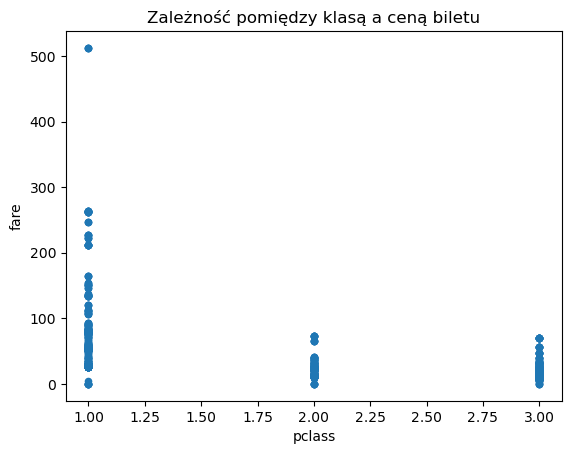

In [43]:
df.plot(kind='scatter', x='pclass', y='fare',title='Zależność pomiędzy klasą a ceną biletu')


<Axes: title={'center': 'Zależność pomiędzy klasą biletu a wiekiem'}, xlabel='pclass', ylabel='age'>

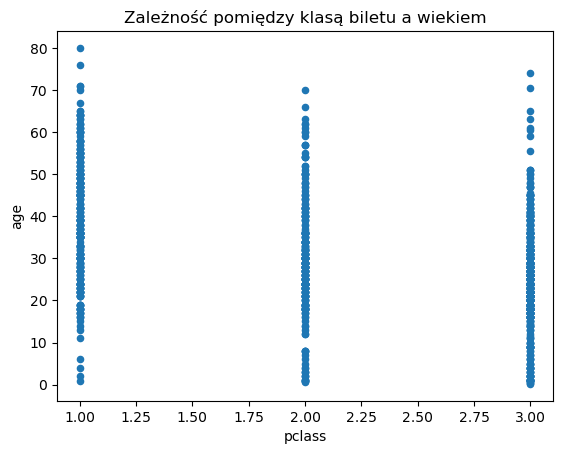

In [44]:
df.plot(kind='scatter', x='pclass', y='age',title='Zależność pomiędzy klasą biletu a wiekiem')


<Axes: title={'center': 'Zależność pomiędzy przeżywalnością a ceną biletu'}, xlabel='survived', ylabel='fare'>

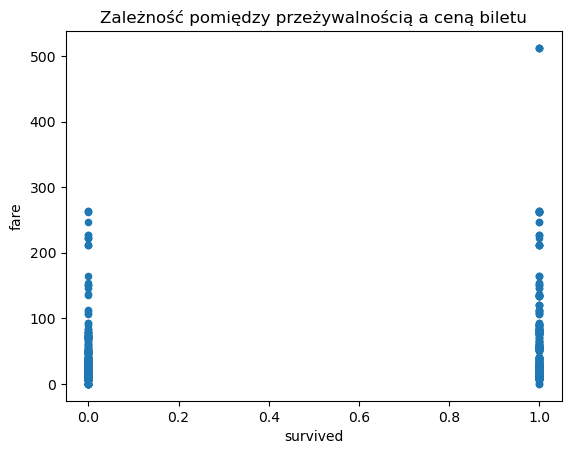

In [45]:
df.plot(kind='scatter', x='survived', y='fare',title='Zależność pomiędzy przeżywalnością a ceną biletu')


<Axes: title={'center': 'Zależność pomiędzy klasą a ceną biletu'}, xlabel='survived', ylabel='pclass'>

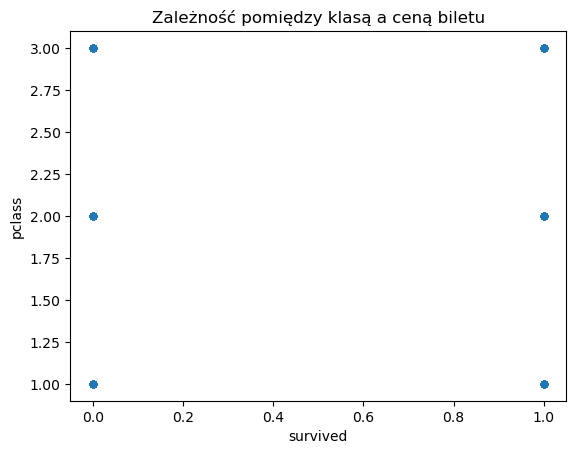

In [46]:
df.plot(kind='scatter', x='survived', y='pclass',title='Zależność pomiędzy klasą a ceną biletu')


### Komentarz
1. Analizowane kategorie są bardzo słabo skorelowane ze sobą
2. Najsilniejsza korelacja występuje pomiędzy klasą a ceną biletu
   - Jest to korelacja ujemna wskazująca na zależność częstszych przypadków wyższej ceny z niższą klasą biletu
   - Wskazywałoby to na lepszej jakości bilety klasy 1
   - Należy jednak zauważyć, że w klasie 1 są bilety zarówno tanie jak i najdroższe. Zależność ta jest więc niejednoznaczna
   - Nie zaobserwowano natomiast zależności ceny biletu do klasy w przypadku porównania pomiędzy klasą 2 a 3
3. Poszukując odpowiedzi na pytanie czy jakaś kategoria miała największy wpływ na przetrwanie należy stwierdzić że nie ma istotnych zależności
   - Na uwagę może zwrócić fakt że wszystkie osoby z najdroższymi biletami poddane badaniu przeżyły
   - Choć osoby uratowane i te które poniosły śmierć należały do wszystkich 3 grup klas biletów największą szansę przeżycia miały posiadające bilet klasy 1

# EDA - krok 6: analiza wartości odstających

## Boxploty dla wybranych kategorii

<Axes: title={'center': 'age'}, xlabel='pclass', ylabel='wiek'>

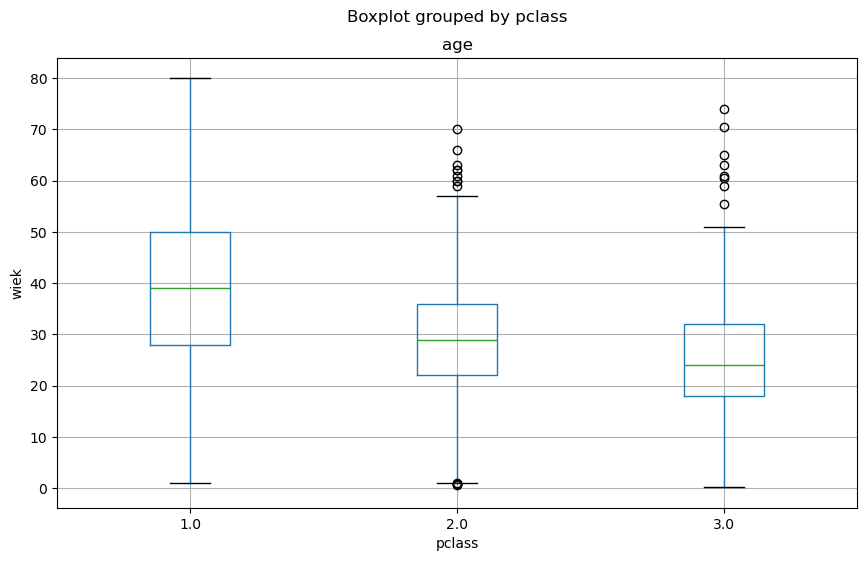

In [47]:
df.boxplot(column='age',by='pclass', ylabel='wiek',figsize=(10,6))

<Axes: title={'center': 'age'}, xlabel='sex', ylabel='wiek'>

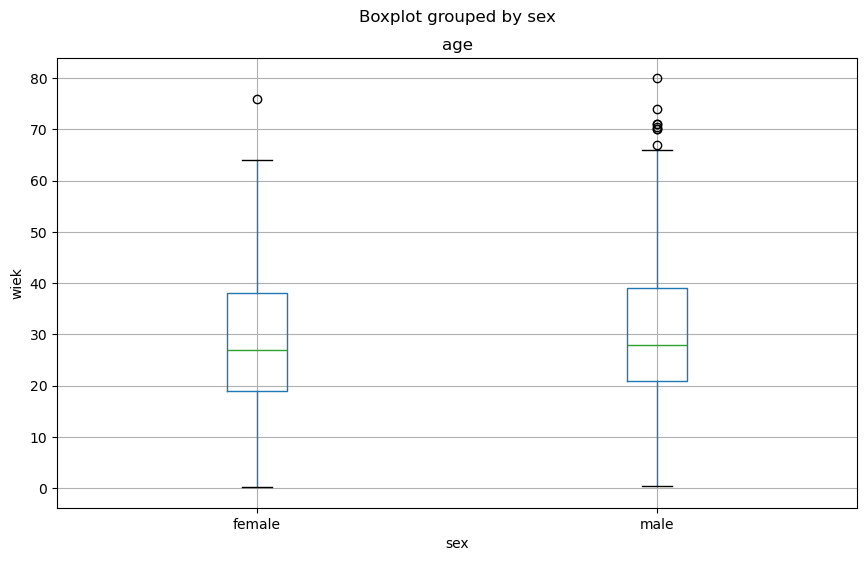

In [48]:
df.boxplot(column='age',by='sex', ylabel='wiek',figsize=(10,6))

<Axes: title={'center': 'age'}, xlabel='survived', ylabel='wiek'>

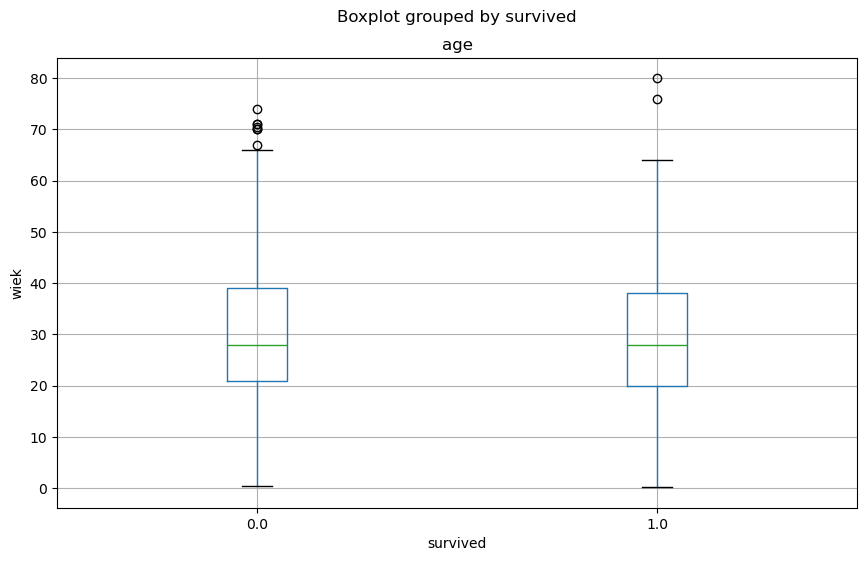

In [49]:
df.boxplot(column='age',by='survived', ylabel='wiek',figsize=(10,6))

### Komentarz
1. Wartości odstające nie występują jedynie dla klasy 1 przy zależności od wieku.
   - jednocześnie mediana wieku jest największa w 1 klasie a najmniejsza w 3
   - prowadzi to do zależności im starsza osoba tym większe prawdopodobieństwo na lepszą klasę
2. Porównywalny jest udział mężczyzn i kobiet w podobnym wieku
3. Przedziały wiekowe wśród osób które przeżyły są bardzo podobne do tych któzy zgineli 

# Podsumowanie i wnioski końcowe
1. Dane charakteryzują pasażerów Titanica i przedstawiają ich przeżywalność
2. Titanic miał 186 kabin, 27 łodzi ratunkowych
3. Pasażerowie wsiadali na pokład z 3 różnych portów i podróżowali do 369 miejsc docelowych
4. Pasażerowie podróżowali w 3 klasach
   - Im niższa klasa biletu tym droższy bilet
   - Proporcjonalnie najwięcej osób przeżyło w grupie z biletami klasy 1
5. Ceny biletów były bardzo zróżnicowane
   - Większość osób miała najtańsze bilety, co sugeruje że zdecydowana liczba pasażerów była znacznie uboższa od niewielkiej części osób bogatych
6. Pasażerowie podróżowali z członkami rodziny oraz samotnie
   - Zdecydowana większość pasażerów podróżowała bez rodziny 60% wszystkich pasażerów
   - 40% wszystkich pasażerów podróżowała z co najmniej 1 członkiem rodziny
   - Ponad połowa osób przeżyła wśród pasażerów podróżujących z 1,2 i 3 członkami rodziny
7. Na pokładzie było więcej mężczyzn niż kobiet
   - Przeżywalność wśród kobiet była zdecydowanie większa niż u mężczyzn
8. Pasażerowie byli bardzo zróżnicowani pod względem wieku (od kilku miesięcy do 80 lat)
   - Dominowali pasażerowie w wieku 20-40 lat
   - Najmłodsza grupa wiekowa (0-10 lat) charakteryzowała się nawiększą przeżywalnością
9. Około 38% pasażerów przeżyło katastrofę, 62% poniosło śmierć
   - 809 osób zgineło, w tym:
     - 121 osób zgineły a ich ciała zostały odnalezione
     - 688 osób zgineły a ich ciała nie zostały odnalezione
   - 500 osób przeżyło